In [13]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("CUDA is available")
else:
    device = torch.device("cpu")
    print("CUDA is not available")

CUDA is not available


In [14]:
import pathlib

data_dir = '/Users/montylee/Documents/GitHub/DeepLearning/pytorch/P5/datasets'
data_dir = pathlib.Path(data_dir)

data_paths = list(data_dir.glob('*'))
classNames = [str(path).split('/')[-1] for path in data_paths]
print(classNames)

train_dir = data_dir / 'train'
test_dir = data_dir / 'test'
print(train_dir)
print(test_dir)

['test', 'train']
/Users/montylee/Documents/GitHub/DeepLearning/pytorch/P5/datasets/train
/Users/montylee/Documents/GitHub/DeepLearning/pytorch/P5/datasets/test


In [15]:
from torchvision import datasets, transforms

train_transforms = transforms.Compose([
    transforms.Resize([224,224]),
    transforms.RandomHorizontalFlip(), # 随机翻转和旋转
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.485, 0.456, 0.406], # 均值
                         std = [0.229, 0.224, 0.225]) # 方差
])

test_transforms = transforms.Compose([
    transforms.Resize([224,224]),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.485, 0.456, 0.406], # 均值
                            std = [0.229, 0.224, 0.225]) # 方差
])

train_data = datasets.ImageFolder(train_dir, transform = train_transforms)
test_data = datasets.ImageFolder(test_dir, transform = test_transforms)

In [16]:
train_data.class_to_idx

{'adidas': 0, 'nike': 1}

In [17]:
batch_size = 32
train_dl = torch.utils.data.DataLoader(train_data, 
                                       batch_size = batch_size, 
                                       shuffle = True, 
                                       num_workers = 1,
                                       drop_last = True)
test_dl = torch.utils.data.DataLoader(test_data, 
                                      batch_size = batch_size, 
                                      shuffle = True, 
                                      num_workers = 1,
                                      drop_last = True)

num_workers 参数用于指定数据加载器中用于加载数据的子进程数量。这个参数的默认值为 0，表示在主进程中直接加载数据，没有使用子进程。如果您将 num_workers 设置为大于 0 的值，那么数据加载器将会使用多个子进程来并行加载数据，从而加快数据加载速度。

在这个代码中，num_workers = 1 表示数据加载器将使用一个子进程来加载数据。这个值通常是一个比较好的默认值，可以在大多数情况下提高数据加载速度，同时不会占用太多系统资源。如果您的系统有更多的 CPU 核心可用，并且数据集非常大，则可以将 num_workers 设置为更高的值，以进一步加速数据加载。

需要注意的是，如果您将 num_workers 设置为大于 0 的值，则需要确保您的代码可以在多个进程中运行，并且可以正确地共享内存。在某些情况下，使用多个子进程来加载数据可能会导致一些问题，例如死锁、内存泄漏等num_workers 参数用于指定数据加载器中用于加载数据的子进程数量。这个参数的默认值为 0，表示在主进程中直接加载数据，没有使用子进程。如果您将 num_workers 设置为大于 0 的值，那么数据加载器将会使用多个子进程来并行加载数据，从而加快数据加载速度。

In [18]:
for x, y in train_dl:
    print(x.shape, y.shape)
    break

torch.Size([32, 3, 224, 224]) torch.Size([32])


In [19]:
import torch.nn.functional as F
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 12,kernel_size = 5,padding = 0),
            nn.BatchNorm2d(12),
            nn.ReLU()
        )

        # self.dropout = nn.Dropout(0.4)

        self.conv2 = nn.Sequential(
            nn.Conv2d(12, 12,kernel_size = 5,padding = 0),
            nn.BatchNorm2d(12),
            nn.ReLU()
        )

        self.pool3 = nn.MaxPool2d(2)

        # self.dropout = nn.Dropout(0.4)

        self.conv4 = nn.Sequential(
            nn.Conv2d(12, 24,kernel_size = 5,padding = 0),
            nn.BatchNorm2d(24),
            nn.ReLU()
        )

        # self.dropout = nn.Dropout(0.4)

        self.conv5 = nn.Sequential(
            nn.Conv2d(24, 24,kernel_size = 5,padding = 0),
            nn.BatchNorm2d(24),
            nn.ReLU()
        )

        # self.dropout = nn.Dropout(0.4)

        self.pool6 = nn.MaxPool2d(2)

        self.dropout = nn.Dropout(0.4)

        self.fc = nn.Linear(24 * 50 * 50, len(classNames))

    def forward(self, x):
        batch_size = x.size(0)
        x = self.conv1(x)
        # x = self.dropout(x)
        x = self.conv2(x)
        # x = self.dropout(x)
        x = self.pool3(x)
        # x = self.dropout(x)
        x = self.conv4(x)
        # x = self.dropout(x)
        x = self.conv5(x)
        # x = self.dropout(x)
        x = self.pool6(x)
        x = self.dropout(x)
        x = x.view(batch_size,-1)
        x = self.fc(x)

        return x
    

model = Model().to(device)
print(model)

Model(
  (conv1): Sequential(
    (0): Conv2d(3, 12, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv2): Sequential(
    (0): Conv2d(12, 12, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Sequential(
    (0): Conv2d(12, 24, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv5): Sequential(
    (0): Conv2d(24, 24, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (pool6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.4, inplace=False)
  (fc): Linear(

正则化是一种常用的减少模型复杂度的方法，它通过在模型的损失函数中添加一个正则项来惩罚模型的复杂度，从而降低过拟合的风险。以下是两种常用的正则化方法：

1. L1/L2 正则化

L1/L2 正则化是一种常用的正则化方法，它通过在模型的损失函数中添加一个 L1/L2 正则项来惩罚模型的复杂度。L1 正则化会使得一些参数变为 0，从而实现特征选择的作用；而 L2 正则化则会使得所有参数都变得很小，从而使模型更加平滑。L1/L2 正则化可以通过在模型的损失函数中添加如下正则项来实现：

L1 正则化： $loss = \text{cross-entropy loss} + \lambda \sum_i |w_i|$

L2 正则化： $loss = \text{cross-entropy loss} + \frac{\lambda}{2} \sum_i w_i^2$

其中，$\lambda是正则化强度的超参数，可以通过调整它的值来控制正则化的程度。

2. Dropout

Dropout 是一种基于随机失活的正则化方法，它可以通过在训练过程中随机地将一些节点的输出设置为 0，从而减少模型的复杂度。具体来说，Dropout 在每次训练迭代中随机选择一些节点进行失活，从而强制模型不依赖于任何单一的节点，使得模型更加鲁棒。在测试过程中，所有节点都是激活的，但是每个节点的输出会乘以一个与失活概率相关的缩放因子，以便与训练过程中保持相同的期望输出。

在 PyTorch 中，可以通过在模型的定义中添加 `nn.Dropout` 层来实现 Dropout 正则化。例如：

```python
import torch.nn as nn

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(10, 20)
        self.dropout = nn.Dropout(p=0.5)
```        

在上面的代码中，`nn.Dropout(p=0.5)` 表示在训练过程中每个节点有 50% 的概率被随机失活。这可以通过减少模型的复杂度，从而降低过拟合的风险。

除了 L1/L2 正则化和 Dropout，还有其他一些正则化方法，如弹性网络（Elastic Net）、最大范数约束（Max Norm Constraint）等。选择合适的正则化方法需要根据具体的问题和数据集进行调整和选择。

In [20]:
# 训练函数
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)

    train_loss, train_acc = 0, 0
    for x, y in dataloader:
        x, y  = x.to(device), y.to(device)

        # Compute prediction error
        pred = model(x) # 网络输出
        loss = loss_fn(pred, y) # 计算损失

        optimizer.zero_grad() # 梯度清零
        loss.backward() # 反向传播
        optimizer.step() # 更新参数

        train_acc += (pred.argmax(1) == y).type(torch.float).sum().item()
        train_loss += loss.item()

    train_acc /= size
    train_loss /= num_batches

    return train_acc, train_loss


# 测试函数
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)

    test_loss, test_acc = 0, 0
    with torch.no_grad():
        for x, y in dataloader:
            x, y  = x.to(device), y.to(device)

            pred = model(x)
            loss = loss_fn(pred, y)
            
            test_loss += loss_fn(pred, y).item()
            test_acc += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_acc /= size
    test_loss /= num_batches

    return test_acc, test_loss

In [21]:
# 设置动态学习率

def adjust_learning_rate(optimizer, epoch, start_lr):
    # 每两个 epoch 衰减为原学习率的 0.92
    lr = start_lr * (0.92 ** (epoch // 2))

    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

# 调用官方动态学习率接口
# from torch.optim.lr_scheduler import LambdaLR
# lambda1 = lambda epoch: 0.98 ** (epoch // 2)
# optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
# scheduler = LambdaLR(optimizer, lr_lambda = lambda1)


learning_rate = 1e-3
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [22]:
from tqdm import tqdm

epoches = 30
loss_fn = nn.CrossEntropyLoss()
train_loss = []
train_acc = []
test_loss = []
test_acc = []

for epoch in tqdm(range(epoches)):
    model.train()
    epoch_train_acc, epoch_train_loss = train(train_dl, model, loss_fn, optimizer)

    model.eval()
    epoch_test_acc, epoch_test_loss = test(test_dl, model, loss_fn)

    train_acc.append(epoch_train_acc)
    train_loss.append(epoch_train_loss)
    test_acc.append(epoch_test_acc)
    test_loss.append(epoch_test_loss)

    template = ('Epoch:{:2d}, Train_acc:{:.1f}%, Train_loss:{:.3f}, Test_acc:{:.1f}%, Test_loss:{:.3f}') 
    tqdm.write(template.format(epoch+1, epoch_train_acc*100, epoch_train_loss, epoch_test_acc*100, epoch_test_loss))
    
print('Done')

  3%|▎         | 1/30 [00:40<19:22, 40.08s/it]

Epoch: 1, Train_acc:48.4%, Train_loss:3.657, Test_acc:43.4%, Test_loss:0.863


  7%|▋         | 2/30 [01:19<18:38, 39.96s/it]

Epoch: 2, Train_acc:45.8%, Train_loss:3.044, Test_acc:53.9%, Test_loss:1.241


 10%|█         | 3/30 [01:59<17:53, 39.77s/it]

Epoch: 3, Train_acc:55.4%, Train_loss:1.715, Test_acc:59.2%, Test_loss:0.593


 13%|█▎        | 4/30 [02:39<17:13, 39.74s/it]

Epoch: 4, Train_acc:55.6%, Train_loss:1.403, Test_acc:43.4%, Test_loss:1.532


 17%|█▋        | 5/30 [03:18<16:33, 39.73s/it]

Epoch: 5, Train_acc:59.8%, Train_loss:0.988, Test_acc:51.3%, Test_loss:0.836


 20%|██        | 6/30 [03:58<15:52, 39.70s/it]

Epoch: 6, Train_acc:65.1%, Train_loss:0.834, Test_acc:46.1%, Test_loss:1.079


 23%|██▎       | 7/30 [04:38<15:11, 39.65s/it]

Epoch: 7, Train_acc:65.5%, Train_loss:0.775, Test_acc:56.6%, Test_loss:0.587


 27%|██▋       | 8/30 [05:17<14:32, 39.67s/it]

Epoch: 8, Train_acc:68.7%, Train_loss:0.803, Test_acc:46.1%, Test_loss:1.691


 30%|███       | 9/30 [05:57<13:52, 39.65s/it]

Epoch: 9, Train_acc:68.1%, Train_loss:0.687, Test_acc:53.9%, Test_loss:0.672


 33%|███▎      | 10/30 [06:36<13:12, 39.61s/it]

Epoch:10, Train_acc:69.7%, Train_loss:0.609, Test_acc:57.9%, Test_loss:0.702


 37%|███▋      | 11/30 [07:16<12:33, 39.64s/it]

Epoch:11, Train_acc:76.9%, Train_loss:0.396, Test_acc:67.1%, Test_loss:0.462


 40%|████      | 12/30 [07:56<11:54, 39.70s/it]

Epoch:12, Train_acc:80.7%, Train_loss:0.354, Test_acc:51.3%, Test_loss:0.900


 43%|████▎     | 13/30 [08:36<11:16, 39.80s/it]

Epoch:13, Train_acc:73.7%, Train_loss:0.461, Test_acc:64.5%, Test_loss:0.475


 47%|████▋     | 14/30 [09:16<10:36, 39.76s/it]

Epoch:14, Train_acc:70.3%, Train_loss:0.564, Test_acc:55.3%, Test_loss:0.821


 50%|█████     | 15/30 [09:55<09:55, 39.73s/it]

Epoch:15, Train_acc:82.7%, Train_loss:0.316, Test_acc:65.8%, Test_loss:0.448


 53%|█████▎    | 16/30 [10:35<09:16, 39.72s/it]

Epoch:16, Train_acc:82.9%, Train_loss:0.323, Test_acc:63.2%, Test_loss:0.427


 57%|█████▋    | 17/30 [11:15<08:36, 39.72s/it]

Epoch:17, Train_acc:82.1%, Train_loss:0.306, Test_acc:68.4%, Test_loss:0.403


 60%|██████    | 18/30 [11:54<07:56, 39.71s/it]

Epoch:18, Train_acc:85.9%, Train_loss:0.248, Test_acc:63.2%, Test_loss:0.520


 63%|██████▎   | 19/30 [12:34<07:16, 39.71s/it]

Epoch:19, Train_acc:79.3%, Train_loss:0.402, Test_acc:65.8%, Test_loss:0.435


 67%|██████▋   | 20/30 [13:14<06:37, 39.71s/it]

Epoch:20, Train_acc:89.4%, Train_loss:0.185, Test_acc:71.1%, Test_loss:0.395


 70%|███████   | 21/30 [13:54<05:57, 39.72s/it]

Epoch:21, Train_acc:89.4%, Train_loss:0.200, Test_acc:67.1%, Test_loss:0.415


 73%|███████▎  | 22/30 [14:33<05:17, 39.70s/it]

Epoch:22, Train_acc:84.9%, Train_loss:0.273, Test_acc:64.5%, Test_loss:0.523


 77%|███████▋  | 23/30 [15:13<04:37, 39.70s/it]

Epoch:23, Train_acc:87.1%, Train_loss:0.222, Test_acc:68.4%, Test_loss:0.456


 80%|████████  | 24/30 [15:53<03:58, 39.78s/it]

Epoch:24, Train_acc:91.4%, Train_loss:0.171, Test_acc:67.1%, Test_loss:0.461


 83%|████████▎ | 25/30 [16:33<03:19, 39.89s/it]

Epoch:25, Train_acc:89.2%, Train_loss:0.179, Test_acc:69.7%, Test_loss:0.470


 87%|████████▋ | 26/30 [17:14<02:40, 40.08s/it]

Epoch:26, Train_acc:90.4%, Train_loss:0.151, Test_acc:69.7%, Test_loss:0.409


 90%|█████████ | 27/30 [17:54<02:00, 40.13s/it]

Epoch:27, Train_acc:90.6%, Train_loss:0.152, Test_acc:71.1%, Test_loss:0.429


 93%|█████████▎| 28/30 [18:35<01:20, 40.29s/it]

Epoch:28, Train_acc:89.0%, Train_loss:0.160, Test_acc:68.4%, Test_loss:0.435


 97%|█████████▋| 29/30 [19:14<00:40, 40.18s/it]

Epoch:29, Train_acc:91.8%, Train_loss:0.135, Test_acc:71.1%, Test_loss:0.377


100%|██████████| 30/30 [19:54<00:00, 39.83s/it]

Epoch:30, Train_acc:90.6%, Train_loss:0.161, Test_acc:65.8%, Test_loss:0.447
Done


在机器学习中，loss（损失）和accuracy（准确率）是两个常用的评价指标，用于衡量模型在训练和测试过程中的表现。

* loss表示模型在训练过程中的错误程度，通常用于优化模型。在训练过程中，模型通过最小化loss来调整权重和偏置，从而提高模型的预测准确性。通常情况下，loss越小，表示模型的拟合效果越好。

* accuracy表示模型在预测时正确分类的样本数量与总样本数量之比，通常用于评估模型的性能。在二分类问题中，accuracy可以简单地表示为预测正确的正样本和负样本的数量之和除以总样本数量。在多分类问题中，accuracy可以表示为预测正确的样本数除以总样本数。通常情况下，accuracy越高，表示模型的预测效果越好。

loss和accuracy的**区别在于它们所衡量的目标不同**。

* loss关注的是模型的训练效果，即模型能否正确地拟合数据，
* 而accuracy关注的是模型的预测效果，即模型能否正确地分类数据。
  
换句话说，loss是用于指导模型如何学习，而accuracy则是用于评估模型的性能。

另外，需要注意的是，**loss和accuracy不一定是完全相反的指标**。有时候，一个模型的loss可以很小，但是accuracy仍然很低，这可能是因为模型在过度拟合数据。因此，在评估模型性能时，我们通常需要综合考虑多个指标，而不是单纯地关注其中一个指标。

> 训练集准确率快速上升到90%，测试集在60%左右波动是为什么？
> 
> 训练集准确率快速上升到90%，而测试集准确率在60%左右波动的原因可能是过拟合（overfitting）。
> 
> * 过拟合是指模型在训练集上表现很好，但在测试集上表现不佳的现象。这通常是由于模型过于复杂，从而可以很好地拟合训练集中的噪声和细节，但无法泛化到测试集中的新数据。
>
> * 当训练集准确率快速上升到90%时，可能表示模型已经过度拟合了训练集，即模型过于复杂，可以完美地匹配训练集中的每个样本。这可能导致模型过于敏感，对于训练集中的噪声和细节也有很好的拟合，但无法泛化到测试集中的新数据。
>
> 为了解决过拟合问题，您可以采取以下措施：
>
> * 减少模型的复杂度：可以通过减少模型的层数、节点数或使用正则化方法（如 L1/L2 正则化、dropout 等）来减少模型的复杂度，从而降低过拟合的风险。
>
> * 增加训练数据量：可以通过增加训练数据量来减少过拟合的风险。更多的训练数据可以帮助模型更好地学习数据的分布，从而减少对噪声和细节的过度拟合。
>
> * 早停法（early stopping）：可以在训练过程中监控测试集的准确率或损失，并在测试集准确率或损失开始上升时停止训练，从而避免模型过度拟合训练集。
>
> * 数据增强（data augmentation）：可以通过对训练数据进行随机变换（如旋转、缩放、平移等）来增加训练数据的多样性和数量，从而减少过拟合的风险。
>
> * 模型集成（model ensemble）：可以通过将多个模型的预测结果进行加权平均或投票来提高模型的泛化能力和鲁棒性，从而减少过拟合的风险。
>
> 除了上述措施，还可以通过交叉验证（cross-validation）等方法来评估模型的性能和泛化能力，从而更好地了解模型的优劣和改进方向。

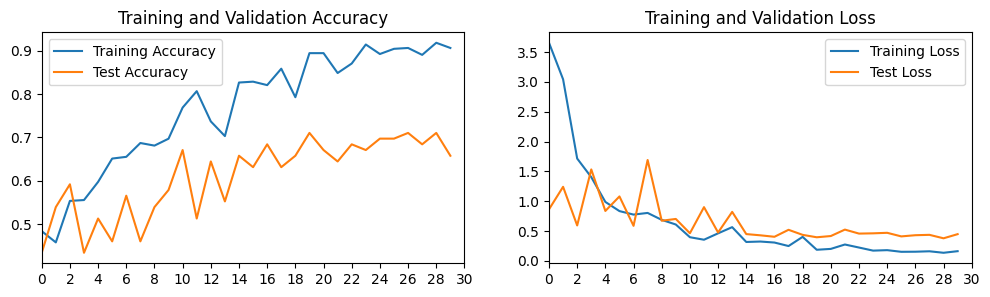

In [23]:
import matplotlib.pyplot as plt

epochs_range = range(epoches)
# print(epochs_range)

plt.figure(figsize = (12, 3))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label = 'Training Accuracy')
plt.plot(epochs_range, test_acc, label = 'Test Accuracy')
plt.xlim((0,epoches))
plt.xticks(range(0,epoches+2,2))
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label = 'Training Loss')
plt.plot(epochs_range, test_loss, label = 'Test Loss')
plt.xlim((0,epoches))
plt.xticks(range(0,epoches+2,2))
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [24]:
# 指定图片预测
from PIL import Image
claeees = list(train_data.class_to_idx)

def predict_image(image_path, model, transform, classes):
    test_img = Image.open(image_path).convert('RGB')
    # plt.imshow(test_img)

    test_img_tensor = transform(test_img)
    img = test_img_tensor.to(device).unsqueeze(0)

    model.eval()
    output = model(img)

    _,pred = torch.max(output, 1)
    pred_class = classes[pred]
    print(f'预测结果：{pred_class}')


predict_image(image_path='/Users/montylee/Documents/GitHub/DeepLearning/pytorch/P5/datasets/train/nike/1 (7).jpg',
              model = model,
              transform = train_transforms,
              classes = claeees)



预测结果：nike


In [25]:
# 模型保存 

PATH = './model.pth' # 保存的参数文件名 
torch.save(model.state_dict(), PATH) # 将参数加载到model当中 
model.load_state_dict(torch.load(PATH, map_location=device))

<All keys matched successfully>